# Временные ряды. Лабораторная работа №1. Кочетков Максим, ШАД-312

### Libraries in use

In [1]:
# !pip install pandas numpy scikit-learn matplotlib seaborn 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

## Wine dataset

### Dataset description

Спектрограмма сортов вин, представленная зависимостью интенсивности поглощения от длины световых волн

### Reading dataset

In [3]:
wine_train = pd.read_csv('Wine_TRAIN', header=None)
wine_test = pd.read_csv('Wine_TEST', header=None)

In [4]:
wine_train[:5]

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7816,1.6417,1.5139,1.3944,1.2820,1.1747,1.0705,0.97042,0.87394,...,-1.6702,-1.7096,-1.7449,-1.7830,-1.8106,-1.8373,-1.8609,-1.8804,-1.9012,-1.9189
1,1,1.7797,1.6389,1.5120,1.3920,1.2778,1.1704,1.0667,0.96700,0.87141,...,-1.6706,-1.7104,-1.7458,-1.7834,-1.8110,-1.8377,-1.8613,-1.8808,-1.9016,-1.9193
2,1,1.7765,1.6363,1.5083,1.3885,1.2755,1.1666,1.0635,0.96505,0.86839,...,-1.6739,-1.7139,-1.7488,-1.7865,-1.8142,-1.8409,-1.8645,-1.8841,-1.9045,-1.9226
3,1,1.7741,1.6351,1.5079,1.3887,1.2772,1.1716,1.0668,0.96652,0.87209,...,-1.6563,-1.6954,-1.7309,-1.7691,-1.7966,-1.8231,-1.8465,-1.8658,-1.8869,-1.9049
4,1,1.7765,1.6377,1.5109,1.3923,1.2791,1.1726,1.0692,0.97037,0.87466,...,-1.6552,-1.6947,-1.7302,-1.7684,-1.7958,-1.8219,-1.8448,-1.8646,-1.8857,-1.9037


In [5]:
wine_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7672,1.6248,1.4978,1.3799,1.2674,1.1595,1.0560,0.95627,0.85922,...,-1.6742,-1.7137,-1.7486,-1.7867,-1.8143,-1.8407,-1.8638,-1.8828,-1.9037,-1.9214
1,1,1.7710,1.6295,1.5011,1.3835,1.2706,1.1612,1.0582,0.95843,0.86224,...,-1.6749,-1.7143,-1.7493,-1.7869,-1.8146,-1.8414,-1.8645,-1.8840,-1.9049,-1.9221
2,1,1.7694,1.6279,1.4991,1.3816,1.2691,1.1616,1.0581,0.95878,0.86306,...,-1.6742,-1.7137,-1.7486,-1.7867,-1.8144,-1.8407,-1.8638,-1.8833,-1.9037,-1.9219
3,1,1.7453,1.6071,1.4807,1.3635,1.2540,1.1494,1.0489,0.95186,0.85799,...,-1.6496,-1.6885,-1.7229,-1.7600,-1.7869,-1.8132,-1.8365,-1.8552,-1.8758,-1.8932
4,1,1.7445,1.6060,1.4795,1.3638,1.2556,1.1506,1.0482,0.94947,0.85696,...,-1.6489,-1.6873,-1.7222,-1.7597,-1.7865,-1.8129,-1.8357,-1.8549,-1.8755,-1.8929


In [6]:
print(f'TRAIN SHAPE: {wine_train.shape}\nTEST SHAPE:  {wine_test.shape}')

TRAIN SHAPE: (57, 235)
TEST SHAPE:  (54, 235)


### EDA

Статистические показатель для датасета WINE

In [28]:
wine_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1.473684,1.702081,1.566104,1.443165,1.329295,1.222572,1.120528,1.021961,0.927181,0.835331,...,-1.657921,-1.696121,-1.730782,-1.768416,-1.794746,-1.820616,-1.842896,-1.861828,-1.882251,-1.899242
std,0.503745,0.036834,0.034933,0.032844,0.030386,0.027760,0.025301,0.023075,0.021198,0.019437,...,0.014012,0.014325,0.014441,0.014569,0.014932,0.015099,0.015370,0.015547,0.015624,0.015828
min,1.000000,1.656500,1.523800,1.403100,1.293100,1.188800,1.089100,0.992010,0.898060,0.807700,...,-1.701900,-1.740000,-1.774800,-1.811900,-1.838000,-1.864200,-1.886600,-1.905400,-1.925600,-1.942500
25%,1.000000,1.678200,1.544900,1.422200,1.311100,1.204200,1.103500,1.006400,0.912090,0.821260,...,-1.661300,-1.699900,-1.734600,-1.773200,-1.799700,-1.825300,-1.847800,-1.866400,-1.887100,-1.904900
50%,1.000000,1.688200,1.553300,1.431400,1.317700,1.212600,1.111800,1.014300,0.919890,0.829050,...,-1.658200,-1.695700,-1.730400,-1.767500,-1.793500,-1.819400,-1.841100,-1.860100,-1.880300,-1.897300
75%,2.000000,1.715300,1.578700,1.455600,1.340100,1.233000,1.131000,1.031600,0.936820,0.845130,...,-1.650700,-1.689100,-1.723900,-1.761400,-1.787800,-1.813600,-1.835900,-1.855000,-1.874900,-1.891900
max,2.000000,1.781600,1.641700,1.513900,1.394400,1.282000,1.174700,1.070800,0.971740,0.875350,...,-1.629700,-1.667200,-1.701900,-1.738500,-1.763200,-1.789100,-1.810700,-1.829600,-1.849900,-1.865800


In [39]:
wine_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.500000,1.704330,1.568287,1.445098,1.331398,1.224639,1.122133,1.023282,0.928181,0.836148,...,-1.656354,-1.694541,-1.729150,-1.766626,-1.793041,-1.819022,-1.841509,-1.860404,-1.880844,-1.897991
std,0.504695,0.028766,0.026843,0.024735,0.022948,0.021017,0.019138,0.017421,0.015688,0.014315,...,0.009367,0.009778,0.010104,0.010607,0.010852,0.011136,0.011402,0.011471,0.011677,0.011801
min,1.000000,1.662900,1.529900,1.411200,1.299700,1.194500,1.095100,0.998770,0.906050,0.815550,...,-1.674900,-1.714300,-1.749300,-1.786900,-1.814600,-1.841400,-1.864500,-1.884000,-1.904900,-1.922100
25%,1.000000,1.680425,1.545375,1.423875,1.312375,1.207700,1.106050,1.008525,0.916360,0.826490,...,-1.664725,-1.703275,-1.738300,-1.775375,-1.802500,-1.828675,-1.851650,-1.870625,-1.890925,-1.908175
50%,1.500000,1.700200,1.565250,1.441750,1.327850,1.221050,1.119550,1.020200,0.925560,0.834665,...,-1.654000,-1.691950,-1.726300,-1.763500,-1.789850,-1.816350,-1.838750,-1.857750,-1.878150,-1.895350
75%,2.000000,1.729700,1.591650,1.466025,1.350000,1.242100,1.139025,1.039175,0.941920,0.847045,...,-1.649700,-1.687700,-1.722050,-1.759550,-1.785850,-1.811250,-1.833250,-1.851950,-1.871850,-1.888850
max,2.000000,1.771000,1.629500,1.501100,1.383500,1.270600,1.161600,1.058200,0.958780,0.863060,...,-1.641300,-1.679000,-1.713500,-1.749900,-1.776100,-1.801400,-1.823700,-1.842400,-1.862800,-1.880400


In [29]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 235 entries, 0 to 234
dtypes: float64(234), int64(1)
memory usage: 104.8 KB


In [38]:
wine_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 235 entries, 0 to 234
dtypes: float64(234), int64(1)
memory usage: 99.3 KB


In [37]:
print(f'Количество NULL в датасете WINE: \nTRAIN: {wine_train.isnull().sum().sum()} \nTEST: {wine_test.isnull().sum().sum()}')

Количество NULL в датасете WINE: 
TRAIN: 0 
TEST: 0


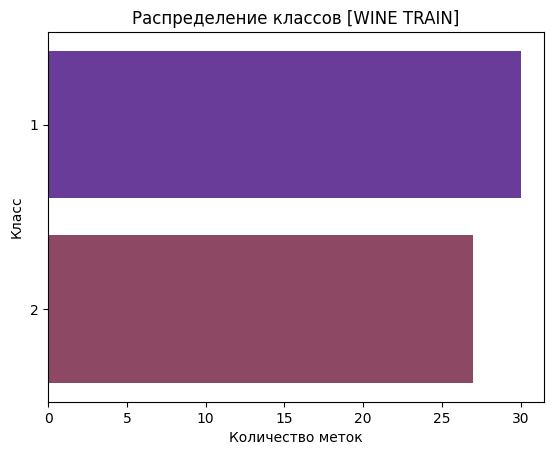

In [7]:
sns.countplot(
    y=wine_train[0],
    palette=['#6a2da8', '#983d61']
)
plt.title("Распределение классов [WINE TRAIN]")
plt.xlabel("Количество меток")
plt.ylabel("Класс")
plt.show()

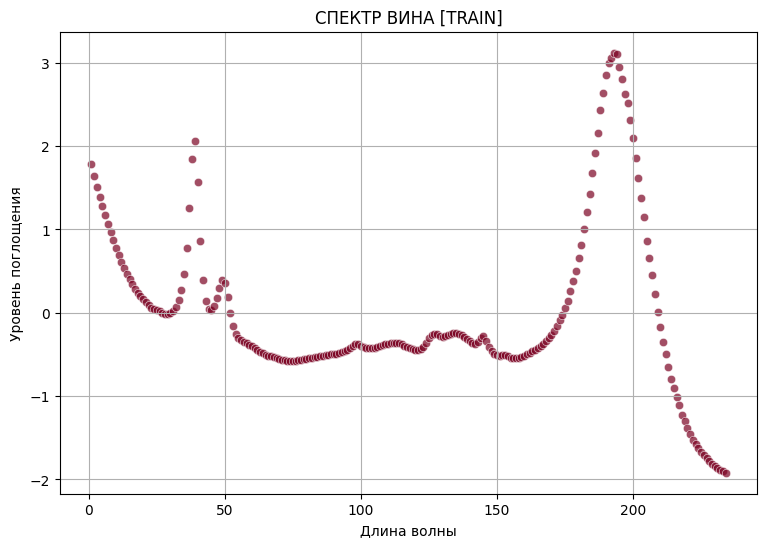

In [8]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_train[(wine_train[0] == 1) | (wine_train[0] == 2)].iloc[0, 1:],
    alpha=0.7,
    color='#7b0323'
)
plt.title('СПЕКТР ВИНА [TRAIN]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

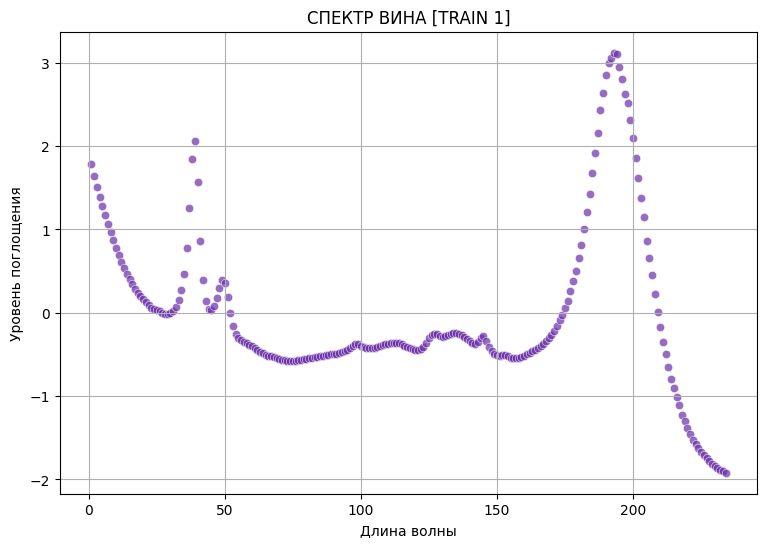

In [9]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_train[wine_train[0] == 1].iloc[0, 1:],
    alpha=0.7,
    color='#6a2da8'
)
plt.title('СПЕКТР ВИНА [TRAIN 1]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

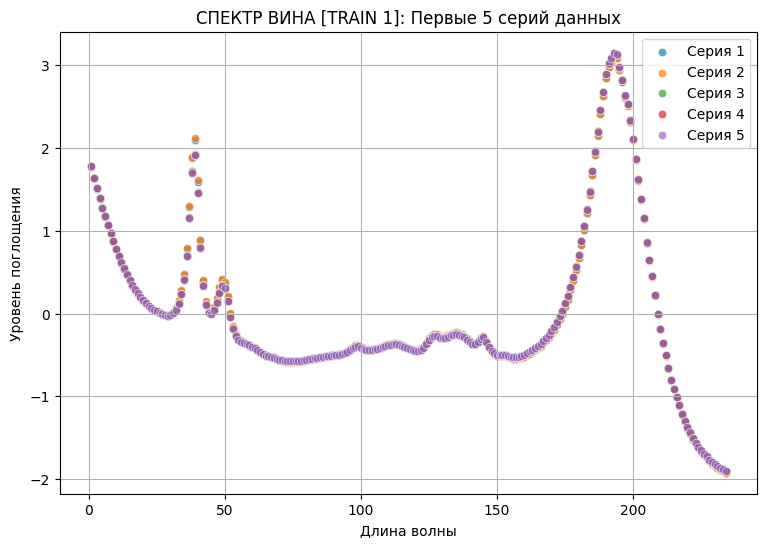

In [48]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.scatterplot(
        data=wine_train[wine_train[0] == 1].iloc[i, 1:],
        label=f'Серия {i}',
        alpha=0.7
    )

plt.title('СПЕКТР ВИНА [TRAIN 1]: Первые 5 серий данных')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.legend()
plt.show()

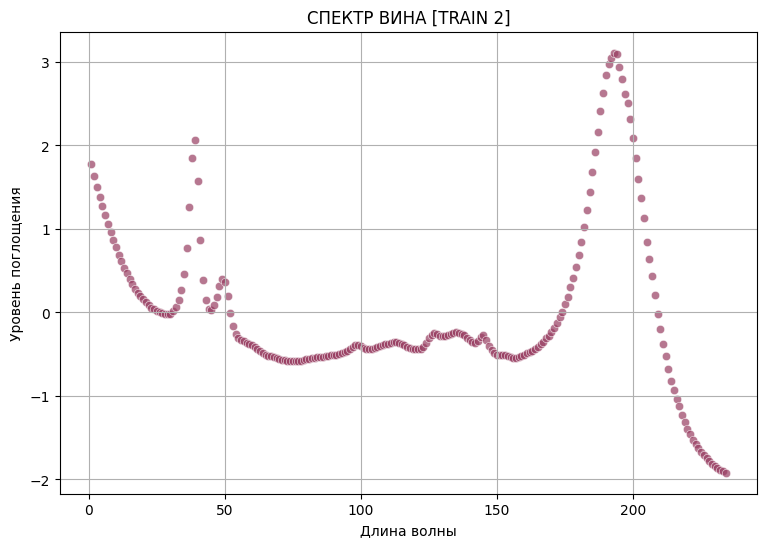

In [10]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_train[wine_train[0] == 2].iloc[0, 1:],
    alpha=0.7,
    color='#983d61'
)
plt.title('СПЕКТР ВИНА [TRAIN 2]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

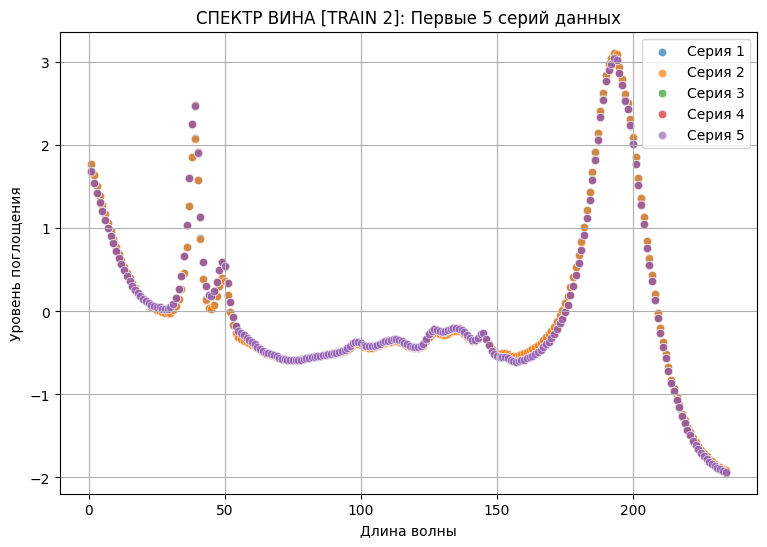

In [47]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.scatterplot(
        data=wine_train[wine_train[0] == 2].iloc[i, 1:],
        label=f'Серия {i}',
        alpha=0.7
    )

plt.title('СПЕКТР ВИНА [TRAIN 2]: Первые 5 серий данных')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.legend()
plt.show()

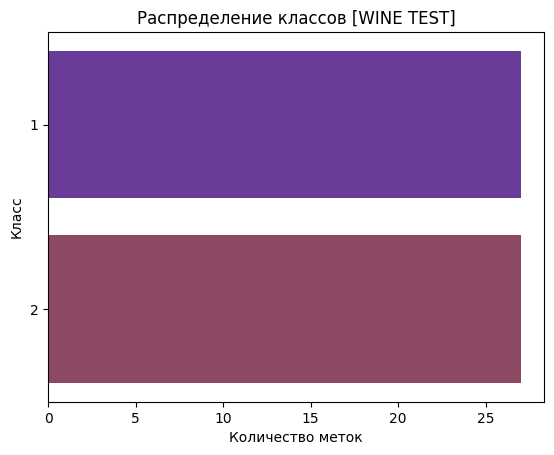

In [11]:
sns.countplot(
    y=wine_test[0],
    palette=['#6a2da8', '#983d61']
)
plt.title("Распределение классов [WINE TEST]")
plt.xlabel("Количество меток")
plt.ylabel("Класс")
plt.show()

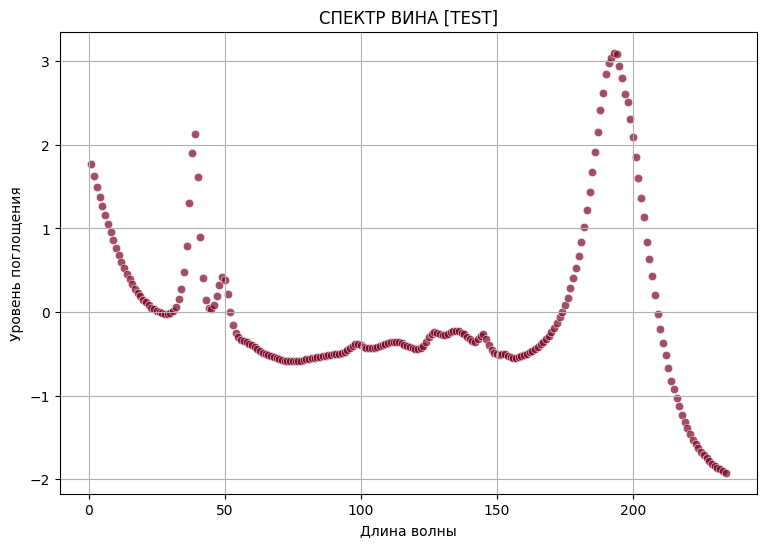

In [12]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_test[(wine_test[0] == 1) | (wine_test[0] == 2)].iloc[0, 1:], 
    alpha=0.7,
    color='#7b0323'
)
plt.title('СПЕКТР ВИНА [TEST]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

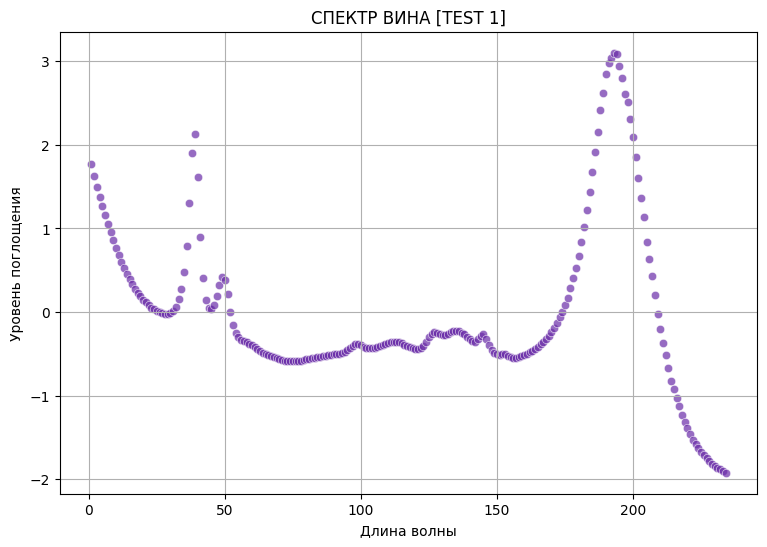

In [13]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_test[wine_test[0] == 1].iloc[0, 1:], 
    alpha=0.7,
    color='#6a2da8'
)
plt.title('СПЕКТР ВИНА [TEST 1]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

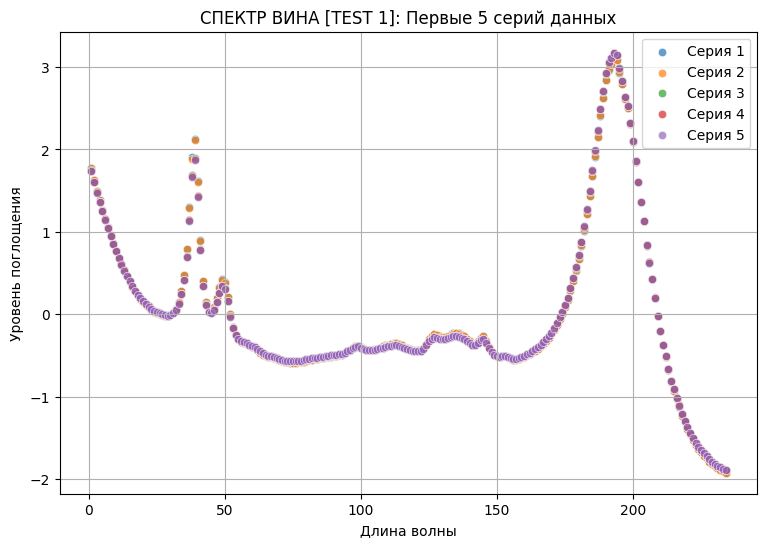

In [49]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.scatterplot(
        data=wine_test[wine_test[0] == 1].iloc[i, 1:],
        label=f'Серия {i}',
        alpha=0.7
    )

plt.title('СПЕКТР ВИНА [TEST 1]: Первые 5 серий данных')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.legend()
plt.show()

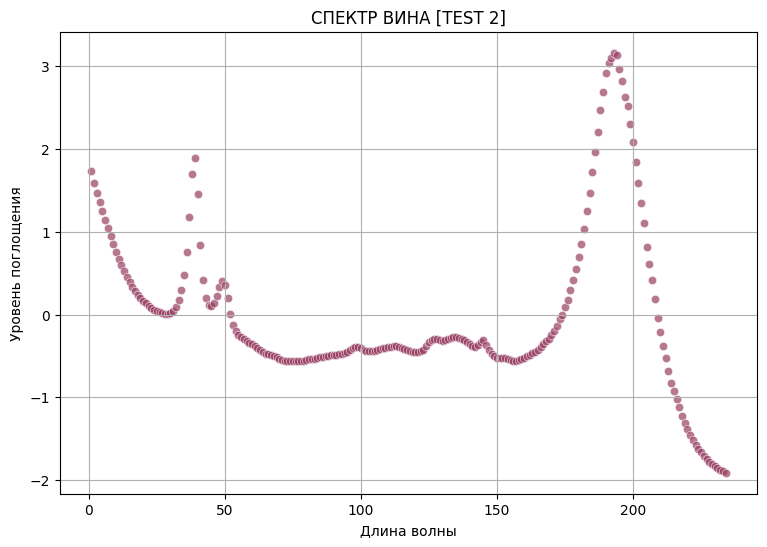

In [14]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=wine_test[wine_test[0] == 2].iloc[0, 1:], 
    alpha=0.7,
    color='#983d61'
)
plt.title('СПЕКТР ВИНА [TEST 2]')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.show()

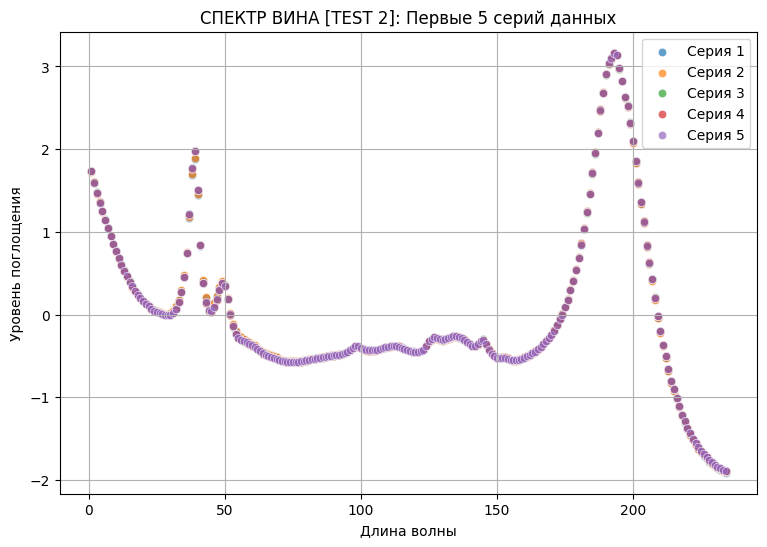

In [50]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.scatterplot(
        data=wine_test[wine_test[0] == 2].iloc[i, 1:],
        label=f'Серия {i}',
        alpha=0.7
    )

plt.title('СПЕКТР ВИНА [TEST 2]: Первые 5 серий данных')
plt.xlabel('Длина волны')
plt.ylabel('Уровень поглощения')
plt.grid(True)
plt.legend()
plt.show()

### Classification ML Model

#### Подготовка данных

In [55]:
X_wine_train = wine_train.drop(columns=[0])
y_wine_train = wine_train[0]
X_wine_test = wine_test.drop(columns=[0])
y_wine_test = wine_test[0]

В приложенной к лабораторной работе статье с описанием датасетов сказано, что данные изначально обработаны. Поэтому достаточно разделение на train/test

#### Обучение моделей

In [68]:
rfc_wine = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rfc_wine.fit(X_wine_train, y_wine_train)
y_wine_pred = rfc_wine.predict(X_wine_test)

In [69]:
rfc_wine_accuracy = accuracy_score(y_wine_test, y_wine_pred)
print(f'RandomForestClassifier ACCURACY: {rfc_wine_accuracy}')

RandomForestClassifier ACCURACY: 0.7407407407407407


In [75]:
y_wine_proba = rfc_wine.predict_proba(X_wine_test)[:, 1]
roc_auc = roc_auc_score(y_wine_test, y_wine_proba)
fpr, tpr, _ = roc_curve(y_wine_test, y_wine_proba, pos_label=2)

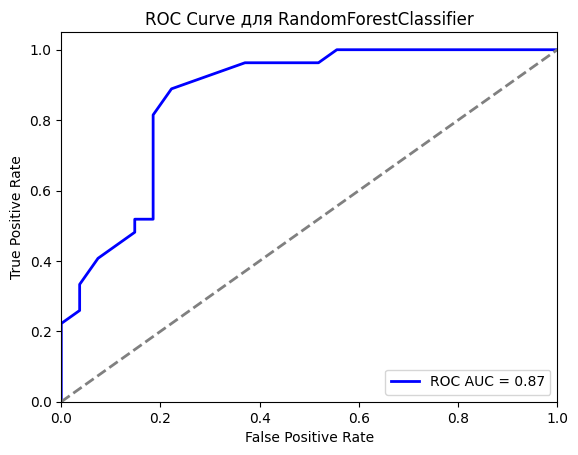

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve для RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

In [85]:
log_reg_wine = LogisticRegression(
    max_iter=1000, 
    random_state=42
)

log_reg_wine.fit(X_wine_train, y_wine_train)
y_wine_pred_log_reg = log_reg_wine.predict(X_wine_test)

In [86]:
log_reg_wine_accuracy = accuracy_score(y_wine_test, y_wine_pred_log_reg)
print(f'LogisticRegression ACCURACY: {log_reg_wine_accuracy}')

LogisticRegression ACCURACY: 0.48148148148148145


In [87]:
log_reg_wine_proba = log_reg_wine.predict_proba(X_wine_test)[:, 1]
roc_auc = roc_auc_score(y_wine_test, log_reg_wine_proba)
fpr, tpr, _ = roc_curve(y_wine_test, log_reg_wine_proba, pos_label=2)

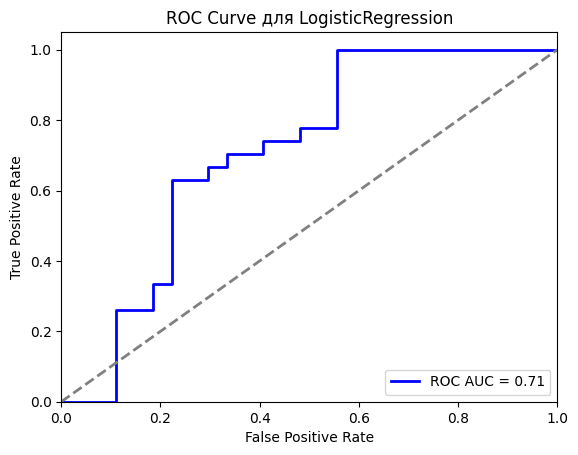

In [88]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve для LogisticRegression')
plt.legend(loc="lower right")
plt.show()

## Yoga dataset

### Dataset description

Набор данных для задачи классификации движений в йоге

### Reading dataset

In [15]:
yoga_train = pd.read_csv('Yoga_TRAIN', header=None)
yoga_test = pd.read_csv('Yoga_TEST', header=None)

In [16]:
yoga_train[:5]

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,-0.074815,-0.099987,-0.12415,-0.14727,-0.16934,-0.19031,-0.21018,-0.22890,-0.24646,...,-0.24712,-0.22248,-0.21588,-0.19327,-0.14695,-0.10947,-0.095929,-0.080018,-0.061776,-0.061776
1,1,0.967690,0.955940,0.94516,0.87896,0.86663,0.85866,0.85172,0.84579,0.84090,...,0.75879,0.81326,0.86449,0.89717,0.93158,0.96224,0.947720,0.983310,0.966560,0.966560
2,2,0.960920,0.928330,0.89653,0.86557,0.83554,0.80644,0.77847,0.75142,0.72531,...,1.25130,1.21390,1.21600,1.22380,1.20910,1.16900,1.129700,1.091000,1.053100,1.029800
3,2,1.908200,1.870500,1.83370,1.79780,1.76290,1.72910,1.69640,1.63020,1.55850,...,1.80560,1.86160,1.88460,1.92150,1.95580,1.96770,1.982100,1.983100,1.953000,1.962700
4,1,2.016700,1.986400,1.95650,1.92720,1.89880,1.87080,1.84360,1.81720,1.79120,...,1.77030,1.82520,1.88040,1.90540,1.93240,1.98900,2.021300,2.035500,2.000300,2.000300


In [17]:
yoga_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,0.71303,0.71253,0.71299,0.66199,0.65729,0.61312,0.60570,0.61113,0.57732,...,0.37777,0.43390,0.49006,0.54338,0.59004,0.62622,0.61866,0.61918,0.66582,0.66582
1,2,1.60470,1.59760,1.59090,1.58460,1.57870,1.57320,1.56830,1.56380,1.55970,...,1.14940,1.18890,1.22850,1.26810,1.30780,1.34740,1.38670,1.41880,1.45420,1.47910
2,1,2.22690,2.23330,2.24030,2.24800,2.25640,2.21280,2.16650,2.11550,2.05930,...,1.54710,1.60430,1.66140,1.71850,1.77560,1.83280,1.88990,1.94710,2.00420,2.06390
3,2,1.59230,1.59920,1.60690,1.61540,1.61970,1.58100,1.58770,1.55080,1.55230,...,0.99759,1.05450,1.11140,1.16830,1.22530,1.28340,1.34060,1.39280,1.40210,1.40440
4,1,0.86213,0.85656,0.85257,0.85015,0.84931,0.85004,0.85236,0.85625,0.86170,...,0.84290,0.81818,0.80008,0.84231,0.82237,0.80391,0.78695,0.77152,0.75898,0.75898


In [18]:
print(f'TRAIN SHAPE: {yoga_train.shape}\nTEST SHAPE:  {yoga_test.shape}')

TRAIN SHAPE: (300, 427)
TEST SHAPE:  (3000, 427)


In [19]:
yoga_train[0].unique()

array([1, 2], dtype=int64)

### EDA

In [41]:
yoga_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.543333,1.050234,1.046237,1.045306,1.043349,1.041034,1.038523,1.035027,1.030098,1.025449,...,0.717449,0.752645,0.787597,0.821279,0.851493,0.879949,0.906319,0.931778,0.954157,0.966125
std,0.498951,0.685446,0.680221,0.675728,0.672514,0.669307,0.664451,0.660469,0.656486,0.649777,...,0.723763,0.722765,0.720253,0.715228,0.712381,0.709772,0.706909,0.703159,0.699747,0.701101
min,1.000000,-0.734620,-0.751970,-0.768020,-0.782720,-0.795880,-0.807540,-0.817680,-0.855550,-0.887620,...,-1.099100,-1.061900,-1.024300,-0.971110,-0.911950,-0.871660,-0.848510,-0.824320,-0.791980,-0.791980
25%,1.000000,0.756618,0.771962,0.771228,0.772838,0.768205,0.743305,0.722535,0.704400,0.687472,...,0.239765,0.281787,0.328525,0.385930,0.435975,0.475420,0.528795,0.570500,0.594455,0.616205
50%,2.000000,1.173950,1.161100,1.177450,1.194850,1.211800,1.232400,1.211900,1.202600,1.188400,...,0.672455,0.715580,0.757445,0.806225,0.867230,0.916690,0.944685,0.987825,1.014200,1.029900
75%,2.000000,1.556375,1.553125,1.550100,1.545450,1.539175,1.531700,1.526975,1.516425,1.507375,...,1.375150,1.404975,1.415475,1.435525,1.453775,1.478975,1.490450,1.500450,1.514225,1.516025
max,2.000000,2.151600,2.171500,2.198400,2.225600,2.222000,2.204800,2.169800,2.160600,2.158300,...,2.058700,2.114500,2.155900,2.178900,2.204000,2.189700,2.155300,2.121600,2.141200,2.141200


In [42]:
yoga_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.535667,1.101444,1.098313,1.096530,1.092859,1.089143,1.085301,1.080667,1.075607,1.069559,...,0.765463,0.800487,0.834592,0.867166,0.898274,0.927912,0.956089,0.981407,1.004076,1.015465
std,0.498809,0.646940,0.641486,0.636457,0.632333,0.627947,0.623348,0.618804,0.614265,0.609877,...,0.696328,0.694770,0.692315,0.689554,0.686073,0.681361,0.675169,0.669111,0.665052,0.666876
min,1.000000,-0.801550,-0.808230,-0.814500,-0.855970,-0.874840,-0.879920,-0.883360,-0.885140,-0.885270,...,-1.380000,-1.345700,-1.310300,-1.276800,-1.257300,-1.222800,-1.138900,-1.072900,-1.338000,-1.338000
25%,1.000000,0.808908,0.811175,0.817870,0.827113,0.830405,0.832445,0.832398,0.815922,0.778600,...,0.283737,0.327958,0.375132,0.416680,0.459222,0.503980,0.549122,0.586335,0.632528,0.655345
50%,2.000000,1.220200,1.230850,1.231550,1.232150,1.238800,1.234100,1.233200,1.236250,1.243900,...,0.818110,0.853920,0.893440,0.929470,0.961945,0.991630,1.022150,1.038000,1.057450,1.072800
75%,2.000000,1.579775,1.568125,1.561950,1.553625,1.543650,1.535625,1.529950,1.527325,1.523800,...,1.361600,1.394825,1.422425,1.447325,1.473225,1.489425,1.502700,1.512625,1.524825,1.529475
max,2.000000,2.273600,2.264400,2.255800,2.248000,2.256400,2.212800,2.175900,2.140100,2.098300,...,2.088700,2.077000,2.094200,2.113100,2.140500,2.175400,2.191200,2.209300,2.229500,2.229500


In [43]:
yoga_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 427 entries, 0 to 426
dtypes: float64(426), int64(1)
memory usage: 1000.9 KB


In [44]:
yoga_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 427 entries, 0 to 426
dtypes: float64(426), int64(1)
memory usage: 9.8 MB


In [40]:
print(f'Количество NULL в датасете YOGA: \nTRAIN: {yoga_train.isnull().sum().sum()} \nTEST: {yoga_test.isnull().sum().sum()}')

Количество NULL в датасете YOGA: 
TRAIN: 0 
TEST: 0


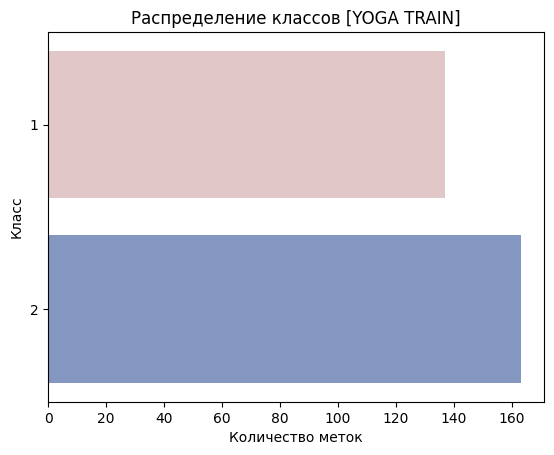

In [20]:
sns.countplot(
    y=yoga_train[0],
    palette=['#e5c3c3', '#7a93ca']
)
plt.title("Распределение классов [YOGA TRAIN]")
plt.xlabel("Количество меток")
plt.ylabel("Класс")
plt.show()

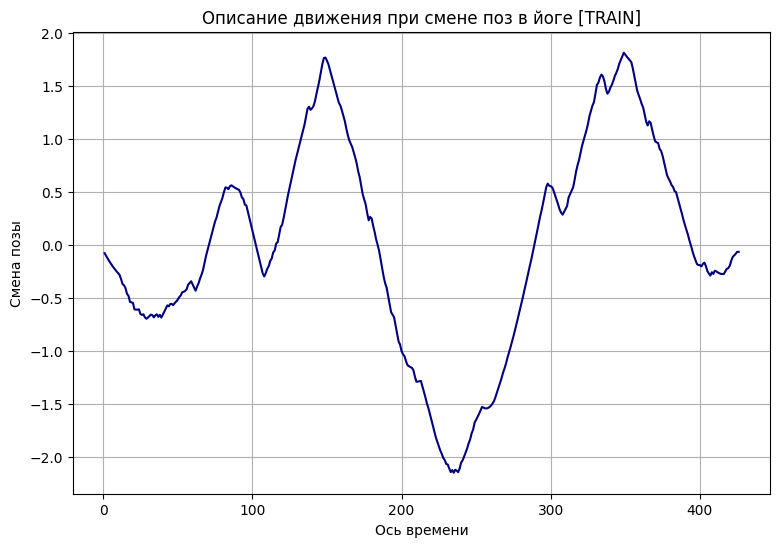

In [21]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_train[(yoga_train[0] == 1) | (yoga_train[0] == 2)].iloc[0, 1:],
    color='#000080'
)
plt.title('Описание движения при смене поз в йоге [TRAIN]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

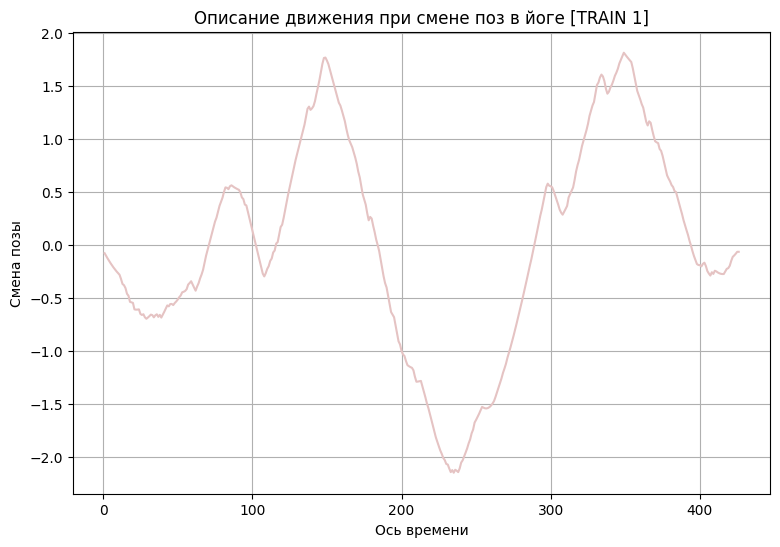

In [22]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_train[yoga_train[0] == 1].iloc[0, 1:],
    color='#e5c3c3'
)
plt.title('Описание движения при смене поз в йоге [TRAIN 1]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

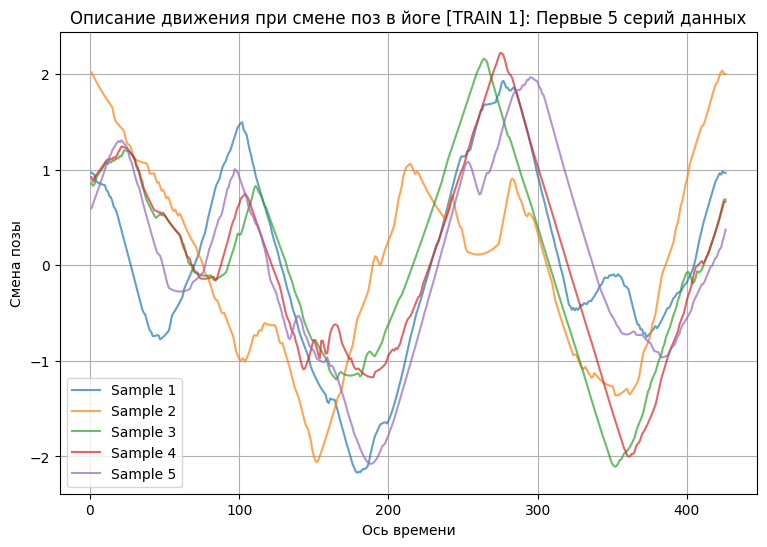

In [51]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.lineplot(
        data=yoga_train[yoga_train[0] == 1].iloc[i, 1:],
        label=f'Sample {i}',
        alpha=0.7
    )

plt.title('Описание движения при смене поз в йоге [TRAIN 1]: Первые 5 серий данных')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.legend()
plt.show()

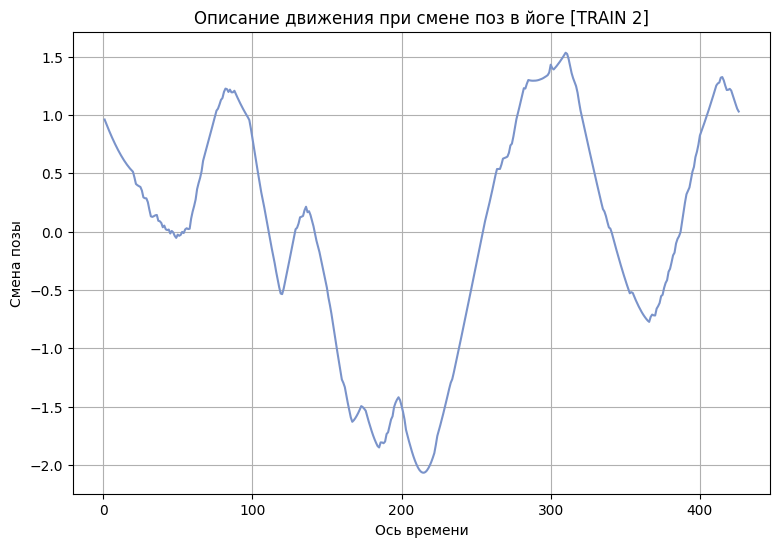

In [23]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_train[yoga_train[0] == 2].iloc[0, 1:],
    color='#7a93ca'
)
plt.title('Описание движения при смене поз в йоге [TRAIN 2]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

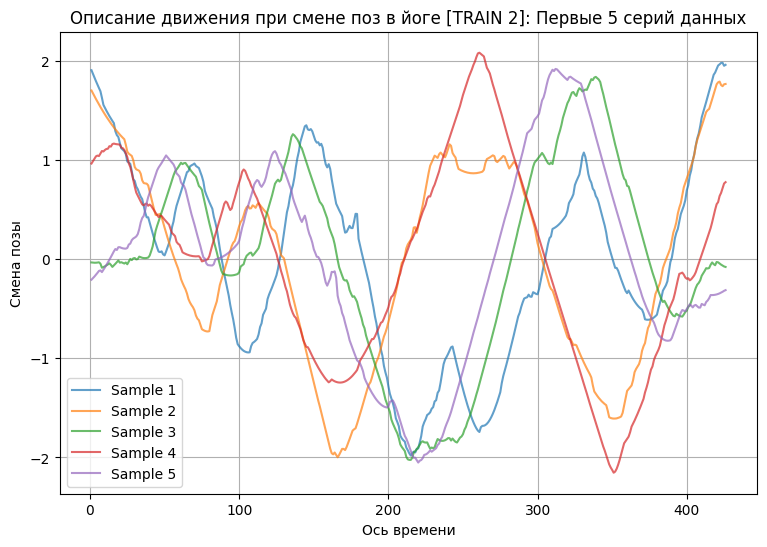

In [52]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.lineplot(
        data=yoga_train[yoga_train[0] == 2].iloc[i, 1:],
        label=f'Sample {i}',
        alpha=0.7
    )

plt.title('Описание движения при смене поз в йоге [TRAIN 2]: Первые 5 серий данных')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.legend()
plt.show()

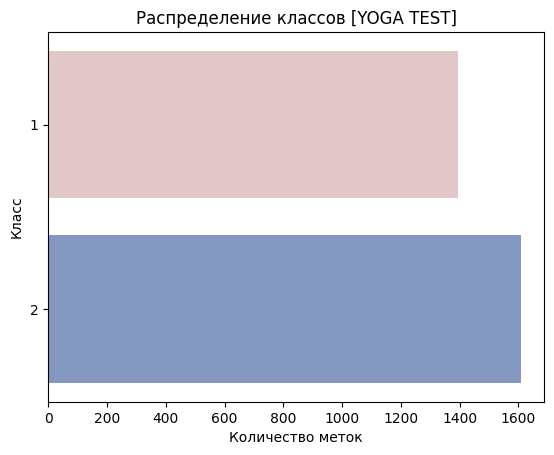

In [24]:
sns.countplot(
    y=yoga_test[0],
    palette=['#e5c3c3', '#7a93ca']
)
plt.title("Распределение классов [YOGA TEST]")
plt.xlabel("Количество меток")
plt.ylabel("Класс")
plt.show()

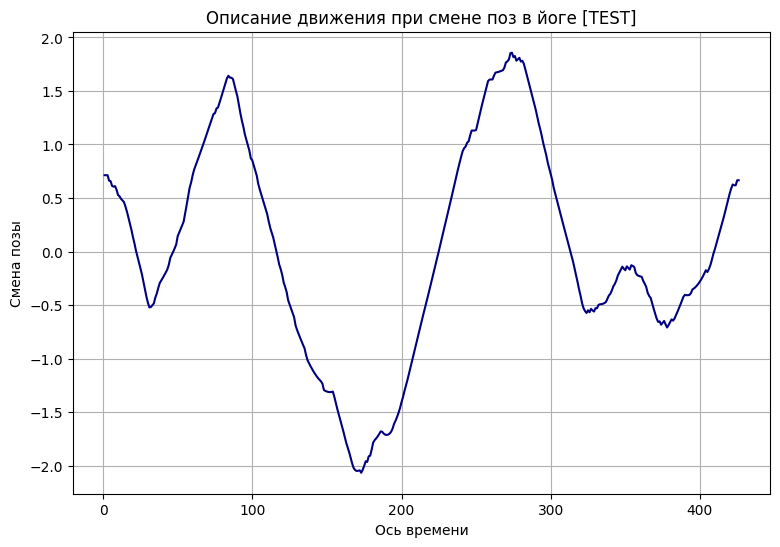

In [25]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_test[(yoga_test[0] == 1) | (yoga_test[0] == 2)].iloc[0, 1:],
    color='#000080'
)
plt.title('Описание движения при смене поз в йоге [TEST]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

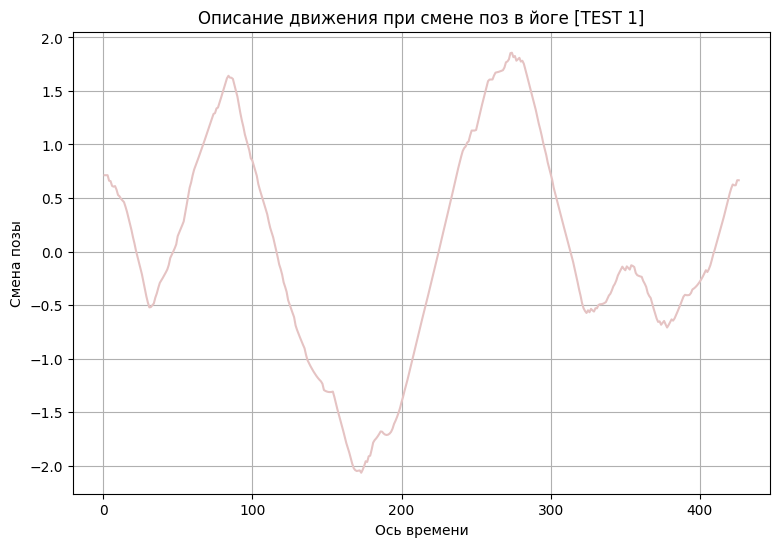

In [26]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_test[yoga_test[0] == 1].iloc[0, 1:],
    color='#e5c3c3'
)
plt.title('Описание движения при смене поз в йоге [TEST 1]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

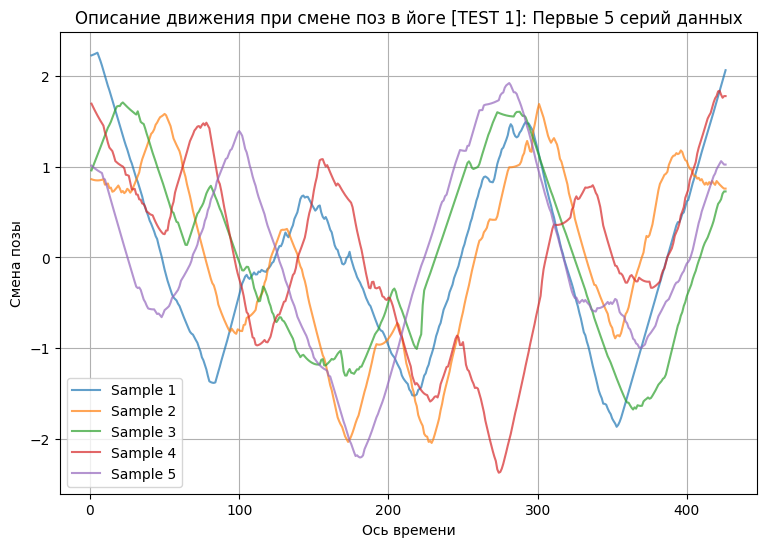

In [53]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.lineplot(
        data=yoga_test[yoga_test[0] == 1].iloc[i, 1:],
        label=f'Sample {i}',
        alpha=0.7
    )

plt.title('Описание движения при смене поз в йоге [TEST 1]: Первые 5 серий данных')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.legend()
plt.show()

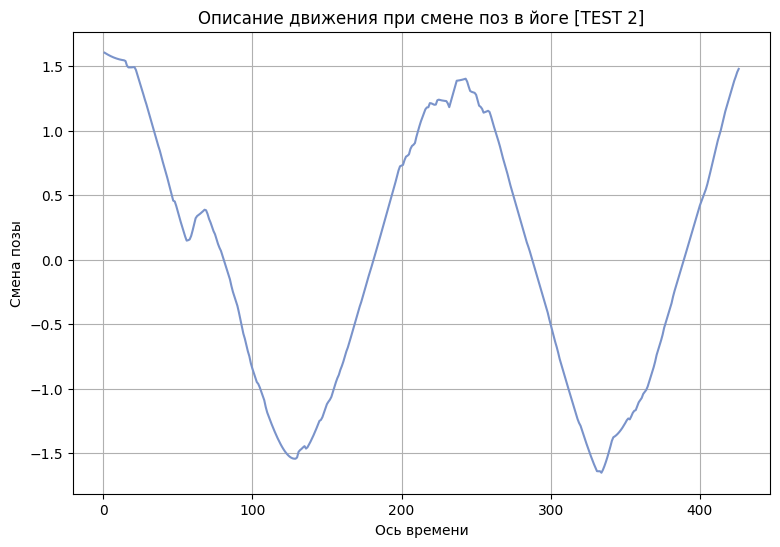

In [27]:
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=yoga_test[yoga_test[0] == 2].iloc[0, 1:],
    color='#7a93ca'
)
plt.title('Описание движения при смене поз в йоге [TEST 2]')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.show()

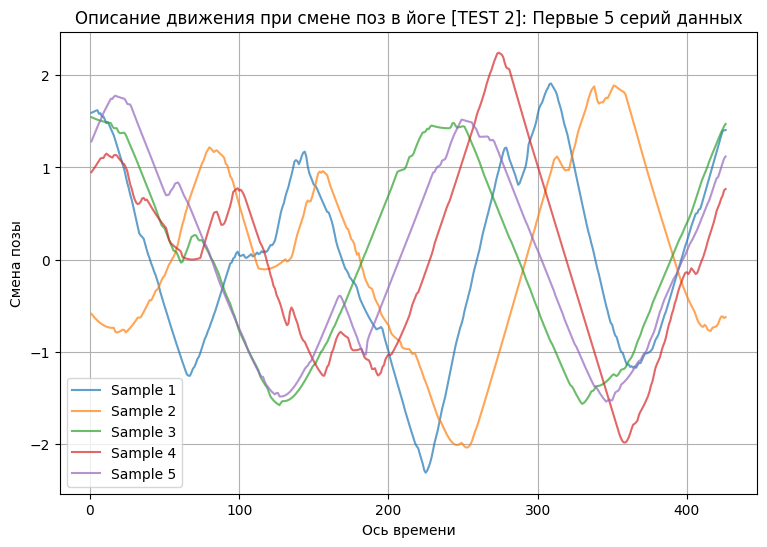

In [54]:
plt.figure(figsize=(9, 6))

for i in range(1, 6):
    sns.lineplot(
        data=yoga_test[yoga_test[0] == 2].iloc[i, 1:],
        label=f'Sample {i}',
        alpha=0.7
    )

plt.title('Описание движения при смене поз в йоге [TEST 2]: Первые 5 серий данных')
plt.xlabel('Ось времени')
plt.ylabel('Смена позы')
plt.grid(True)
plt.legend()
plt.show()

### Classification ML Model

#### Подготовка данных

In [89]:
X_yoga_train = yoga_train.drop(columns=[0])
y_yoga_train = yoga_train[0]
X_yoga_test = yoga_test.drop(columns=[0])
y_yoga_test = yoga_test[0]

В приложенной к лабораторной работе статье с описанием датасетов сказано, что данные изначально обработаны. Поэтому достаточно разделение на train/test

#### Обучение модели

In [90]:
rfc_yoga = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rfc_yoga.fit(X_yoga_train, y_yoga_train)
y_yoga_pred = rfc_yoga.predict(X_yoga_test)

In [91]:
rfc_yoga_accuracy = accuracy_score(y_yoga_test, y_yoga_pred)
print(f'RandomForestClassifier ACCURACY: {rfc_yoga_accuracy}')

RandomForestClassifier ACCURACY: 0.8103333333333333


In [92]:
y_yoga_proba = rfc_yoga.predict_proba(X_yoga_test)[:, 1]
roc_auc = roc_auc_score(y_yoga_test, y_yoga_proba)
fpr, tpr, _ = roc_curve(y_yoga_test, y_yoga_proba, pos_label=2)

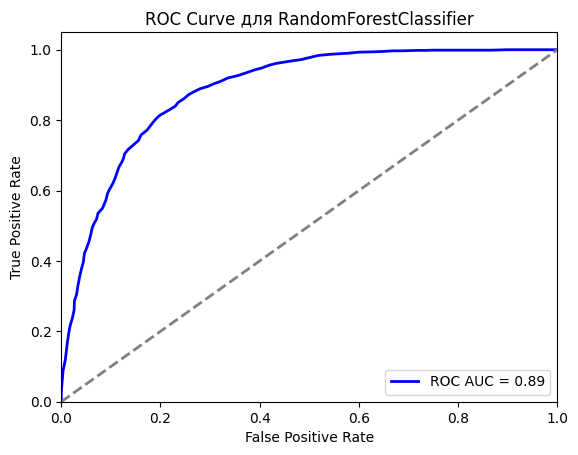

In [93]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve для RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

In [94]:
log_reg_yoga = LogisticRegression(
    max_iter=1000, 
    random_state=42
)

log_reg_yoga.fit(X_yoga_train, y_yoga_train)
y_yoga_pred_log_reg = log_reg_yoga.predict(X_yoga_test)

In [95]:
log_reg_yoga_accuracy = accuracy_score(y_yoga_test, y_yoga_pred_log_reg)
print(f'LogisticRegression ACCURACY: {log_reg_yoga_accuracy}')

LogisticRegression ACCURACY: 0.6576666666666666


In [96]:
log_reg_yoga_proba = log_reg_yoga.predict_proba(X_yoga_test)[:, 1]
roc_auc = roc_auc_score(y_yoga_test, log_reg_yoga_proba)
fpr, tpr, _ = roc_curve(y_yoga_test, log_reg_yoga_proba, pos_label=2)

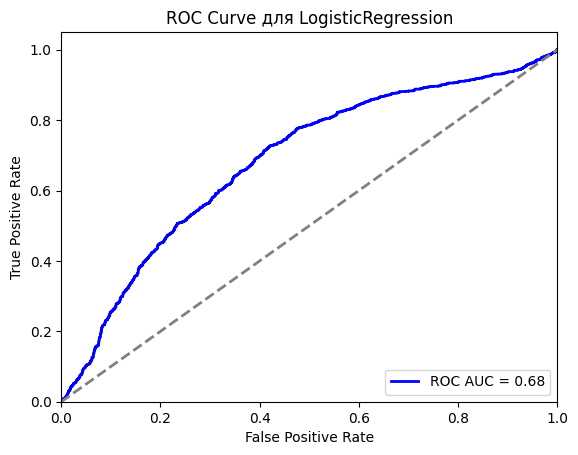

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve для LogisticRegression')
plt.legend(loc="lower right")
plt.show()